In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('master.csv')
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [3]:
df.rename(columns={"suicides/100k pop":"suicides_pop","HDI for year":"HDI_for_year",
                  " gdp_for_year ($) ":"gdp_for_year"," gdp_per_capita ($) ":"gdp_per_capita",
                    "gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)

In [4]:
print(df.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_pop', 'country-year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')


In [5]:
type(df.gdp_for_year[1]),df['age']

(str,
 0        15-24 years
 1        35-54 years
 2        15-24 years
 3          75+ years
 4        25-34 years
             ...     
 27815    35-54 years
 27816      75+ years
 27817     5-14 years
 27818     5-14 years
 27819    55-74 years
 Name: age, Length: 27820, dtype: object)

In [6]:
df['gdp_for_year'] = df['gdp_for_year'].str.replace(',','').astype(np.int64)
df['age']=df['age'].str.replace("5-14 years","05-14 years")

In [7]:
type(df.gdp_for_year[1])

numpy.int64

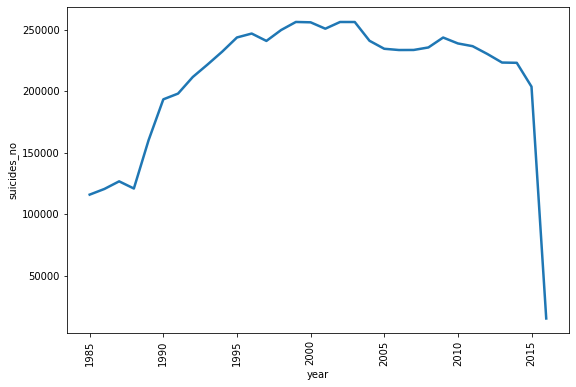

year
1985    116063
1986    120670
1987    126842
1988    121026
1989    160244
1990    193361
1991    198020
1992    211473
1993    221565
1994    232063
1995    243544
1996    246725
1997    240745
1998    249591
1999    256119
2000    255832
2001    250652
2002    256095
2003    256079
2004    240861
2005    234375
2006    233361
2007    233408
2008    235447
2009    243487
2010    238702
2011    236484
2012    230160
2013    223199
2014    222984
2015    203640
2016     15603
Name: suicides_no, dtype: int64

In [8]:
df_sex = df.groupby("year")["suicides_no"].sum()
df_reset_sex = df_sex.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot(x="year", y=df_reset_sex.suicides_no,
             data = df_reset_sex, linewidth = 2.5, markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()
df_sex

sex
female    13910
male      13910
Name: sex, dtype: int64

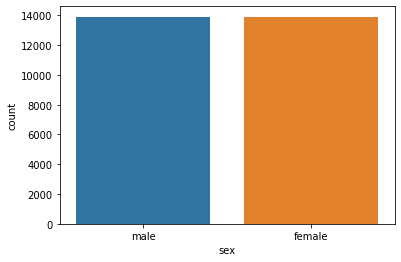

In [9]:
sns.countplot(x='sex',data=df),df['sex'].value_counts()
df.groupby('sex')['sex'].agg('count')

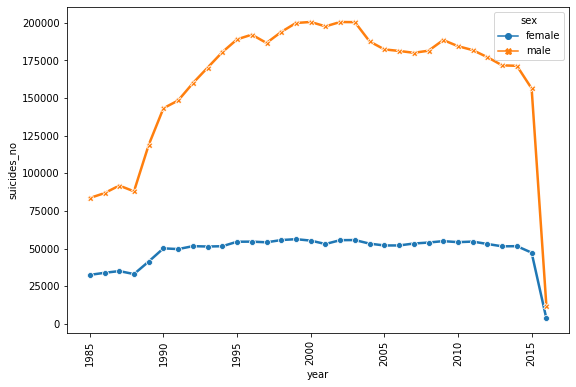

In [10]:
df_sex = df.groupby(["year","sex"])["suicides_no"].sum()
df_reset_sex = df_sex.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot(x="year", y=df_reset_sex.suicides_no, hue = "sex",
             data = df_reset_sex, linewidth = 2.5, style = "sex", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

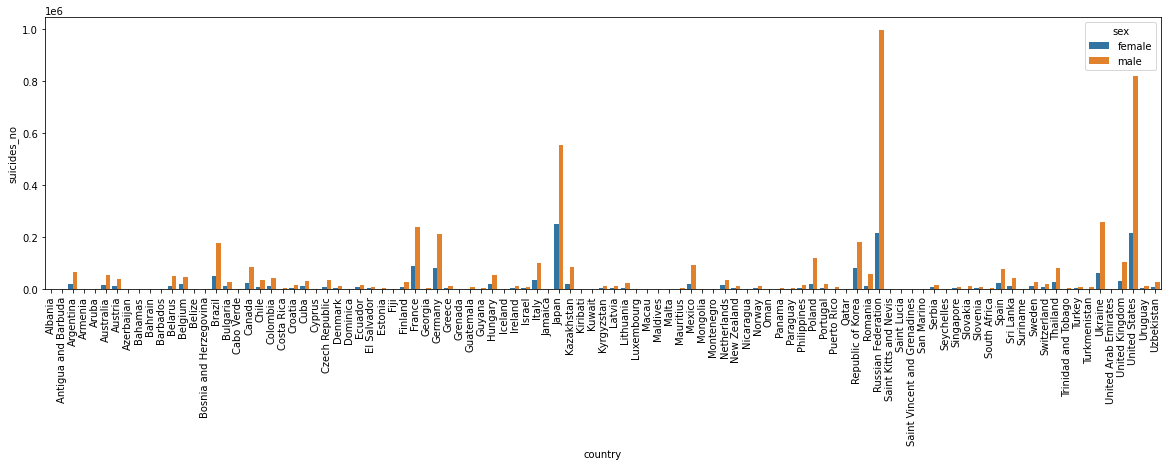

In [11]:
plt.figure(figsize=(20,5))
sns.barplot(x = "country", y = 'suicides_no', hue = "sex", data = df.groupby(["country", "sex"]).sum().reset_index())
plt.xticks(rotation = 90)
plt.show()

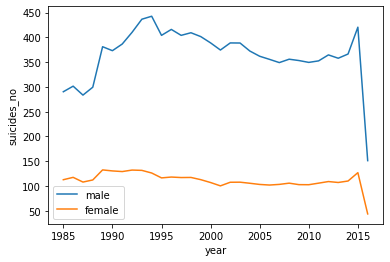

In [12]:
df_men = df[df.sex == "male"]
df_women = df[df.sex == "female"]
sns.lineplot(x=df_men.year, y=df.suicides_no, ci = None)
sns.lineplot(x=df_women.year, y=df.suicides_no, ci = None)
plt.legend(["male", 'female'])
plt.show()

(<AxesSubplot:xlabel='generation', ylabel='count'>,
 Generation X       6408
 Silent             6364
 Millenials         5844
 Boomers            4990
 G.I. Generation    2744
 Generation Z       1470
 Name: generation, dtype: int64)

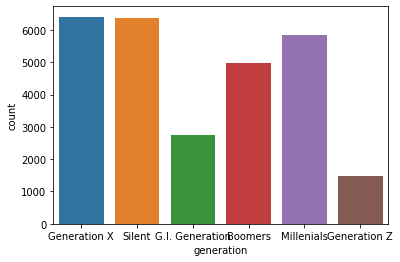

In [13]:
sns.countplot(x='generation',data=df),df['generation'].value_counts()

<AxesSubplot:ylabel='generation'>

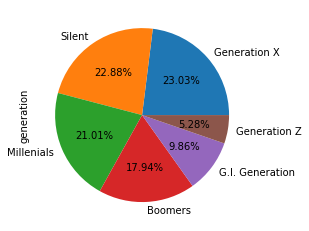

In [14]:
df['generation'].value_counts().plot.pie(autopct='%0.2f%%')

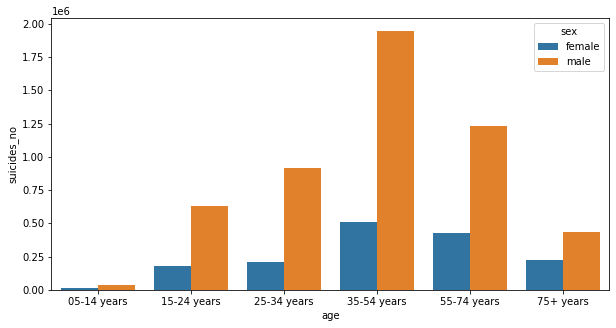

,age,sex,year,suicides_no,population,suicides_pop,HDI_for_year,gdp_for_year,gdp_per_capita
0,05-14 years,female,4612704,16997,4107939076,1065.49,541.291,1030567538182042,38759885
1,05-14 years,male,4612704,35267,4290754161,1792.90,541.291,1030567538182042,38759885
2,15-24 years,female,4644960,175437,4245159089,10045.33,541.291,1033492748193163,39170527
3,15-24 years,male,4644960,633105,4397787807,31487.36,541.291,1033492748193163,39170527
4,25-34 years,female,4644960,208823,4190523226,10614.42,541.291,1033492748193163,39170527
5,25-34 years,male,4644960,915089,4247580361,45957.10,541.291,1033492748193163,39170527
6,35-54 years,female,4644960,506233,7266872023,13732.15,541.291,1033492748193163,39170527
7,35-54 years,male,4644960,1945908,7109016100,55653.87,541.291,1033492748193163,39170527
8,55-74 years,female,4644960,430036,4756740046,16533.52,541.291,1033492748193163,39170527
9,55-74 years,male,4644960,1228407,4046505294,58460.68,541.291,1033492748193163,39170527


In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x = "age", y = 'suicides_no', hue = "sex", data = df.groupby(["age", "sex"]).sum().reset_index())
plt.show()
data = df.groupby(["age", "sex"]).sum().reset_index()
data

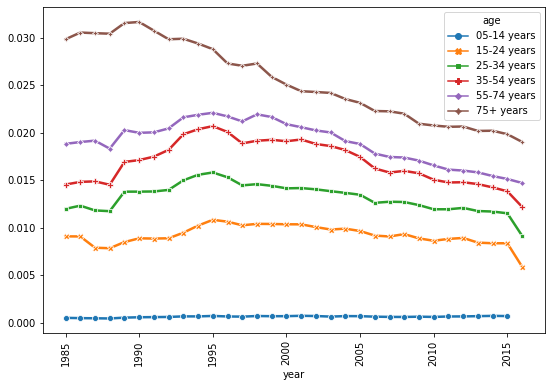

In [16]:
df_age = df.groupby(["year","age"])[["suicides_no","population"]].apply(sum)
df_reset = df_age.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot(x="year", y=df_reset.suicides_no*100/df_reset.population, hue = "age",
             data = df_reset, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

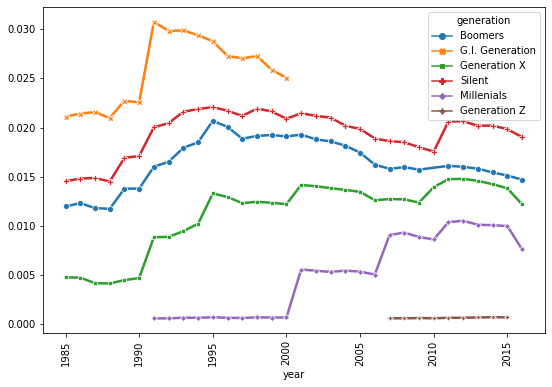

In [17]:
df_generation = df.groupby(["year", "generation"])[["suicides_no","population"]].sum()
df_generation_reset = df_generation.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot(x="year", y=df_generation_reset.suicides_no*100/df_generation_reset.population, hue = "generation", 
            data = df_generation_reset, linewidth = 2.5, style = "generation", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

In [18]:
coutry_suicides_no=df.groupby('country')['suicides_no'].max().sort_values(ascending=False).head(25)


In [19]:
df_suino=df.groupby(['country','year']).suicides_no.sum()
df_sum=df_suino.sort_index(ascending=False)[:]
df_pop = df.groupby(["country","year"]).population.sum()
df_pop_sum = df_pop.sort_index(ascending=False)[:]
df_total = df_sum / df_pop_sum
df_total.head(10)

country     year
Uzbekistan  2014    0.000077
            2013    0.000073
            2012    0.000070
            2011    0.000063
            2010    0.000057
            2009    0.000055
            2005    0.000052
            2004    0.000054
            2003    0.000062
            2002    0.000070
dtype: float64

In [20]:
country_dict={}
for country in df_total.index.get_level_values(0):
    if country not in country_dict.keys():
        country_dict[country] = df_total[country].mean()
    else:
        pass

tup = list(country_dict.items())
tup.sort(key= lambda pair:pair[1], reverse = True)

country_list = [a[0] for a in tup]
country_suicide = [a[1] for a in tup]

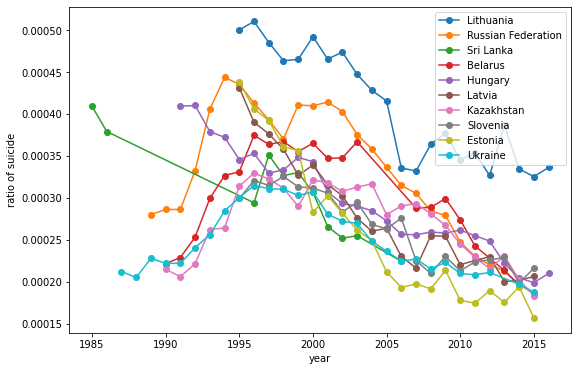

In [21]:
plt.figure(figsize = (9,6))
for country in country_list[:10]:
    plt.plot(df_total[country].index,df_total[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("ratio of suicide")
plt.legend()
plt.show()

country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Germany                291262
Republic of Korea      261730
Brazil                 226613
Poland                 139098
United Kingdom         136805
Italy                  132060
Mexico                 111139
Thailand               110643
Canada                 107561
Kazakhstan             101546
Spain                  100202
Argentina               82219
Hungary                 73891
Romania                 72777
Australia               70111
Belgium                 62761
Belarus                 59892
Sri Lanka               55641
Colombia                53080
Netherlands             50833
Name: suicides_no, dtype: int64

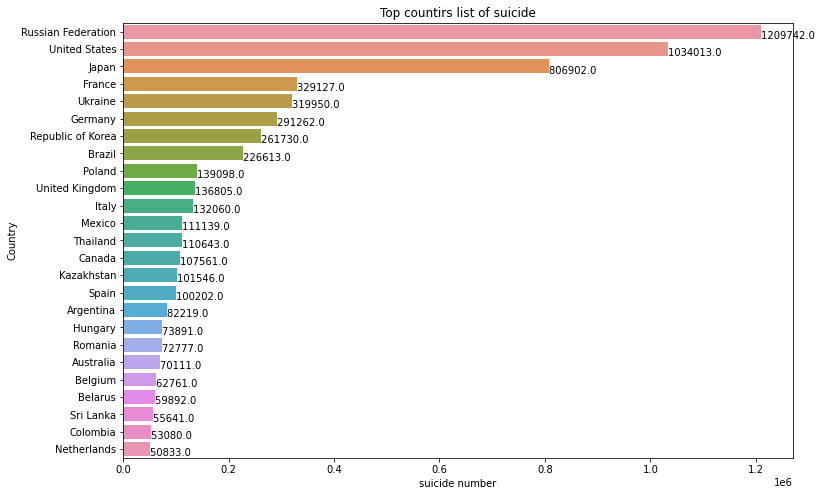

In [22]:
coutry_suicides_no=df.groupby('country')['suicides_no'].apply(sum).sort_values(ascending=False).head(25)
plt.figure(figsize=(12,8))
ax=sns.barplot(x=coutry_suicides_no,y=coutry_suicides_no.index)
plt.xlabel('suicide number')
plt.ylabel('Country')
plt.title('Top countirs list of suicide')
for patch in ax.patches:
    width=patch.get_width()
    height=patch.get_height()
    x=patch.get_x()
    y=patch.get_y()
    plt.text(width + x, height + y, '{:.1f} '.format(width))
coutry_suicides_no

In [23]:
k=df.groupby(["country","year"]).sum().reset_index()
k

,country,year,suicides_no,population,suicides_pop,HDI_for_year,gdp_for_year,gdp_per_capita
0,Albania,1987,73,2709600,31.85,0.000,25879498800,9552
1,Albania,1988,63,2764300,32.46,0.000,25512000000,9228
2,Albania,1989,68,2803100,33.40,0.000,28021499856,9996
3,Albania,1992,47,2822500,18.00,0.000,8513431008,3012
4,Albania,1993,73,2807300,32.56,0.000,14736852456,5244
...,...,...,...,...,...,...,...,...
2316,Uzbekistan,2010,1464,25651783,63.23,7.860,471993251148,18396
2317,Uzbekistan,2011,1640,25978049,67.14,7.932,550982294268,21204
2318,Uzbekistan,2012,1835,26381830,77.53,8.016,621858880056,23568
2319,Uzbekistan,2013,1950,26838924,78.86,8.064,692285441532,25800


C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year', ylabel='Density'>

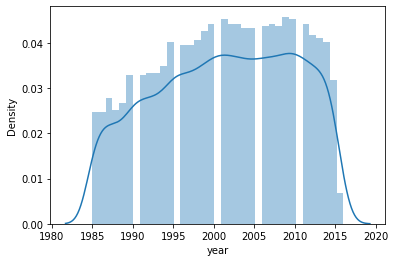

In [24]:
sns.distplot(a=df.year)

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gdp_per_capita', ylabel='Density'>

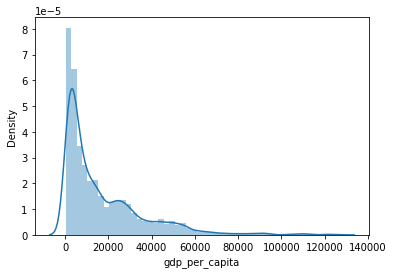

In [25]:
sns.distplot(df['gdp_per_capita'])

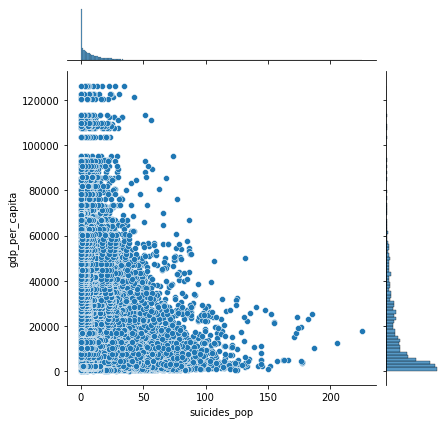

In [26]:
sns.jointplot(x='suicides_pop', y='gdp_per_capita', data = df)

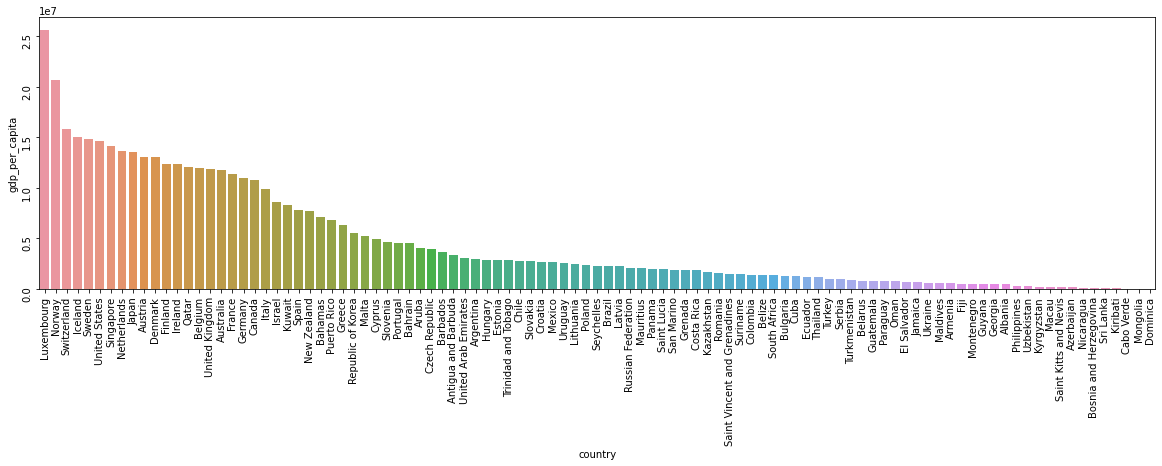

,country,year,suicides_no,population,suicides_pop,HDI_for_year,gdp_for_year,gdp_per_capita
53,Luxembourg,744000,1958,12953156,6156.56,102.132,11380778457768,25593000
64,Norway,720180,16992,127973087,4658.76,99.468,90923636775936,20635056
90,Switzerland,505260,26217,149994010,4794.07,87.264,115045719181704,15871404
41,Iceland,764160,1108,8407904,4889.74,103.620,4101398167282,15002956
89,Sweden,716508,37795,253297131,5247.72,95.760,127080607497252,14806012
...,...,...,...,...,...,...,...,...
87,Sri Lanka,263676,55641,182525626,4658.96,15.312,2023090849368,119364
48,Kiribati,263472,53,741606,878.51,0.000,7825425324,115620
17,Cabo Verde,24132,42,452179,133.84,0.000,22377888972,49488
59,Mongolia,20160,423,2167589,184.39,0.000,111834581310,41450


In [27]:
country_gdp= df.groupby("country").sum().reset_index()
plt.figure(figsize=(20,5))
sns.barplot(x = "country", y = 'gdp_per_capita', data = country_gdp.sort_values(by = "gdp_per_capita", ascending = False))
plt.xticks(rotation = 90)
plt.yticks(rotation= 90)
plt.show()
data = country_gdp.sort_values(by = "gdp_per_capita", ascending = False)
data

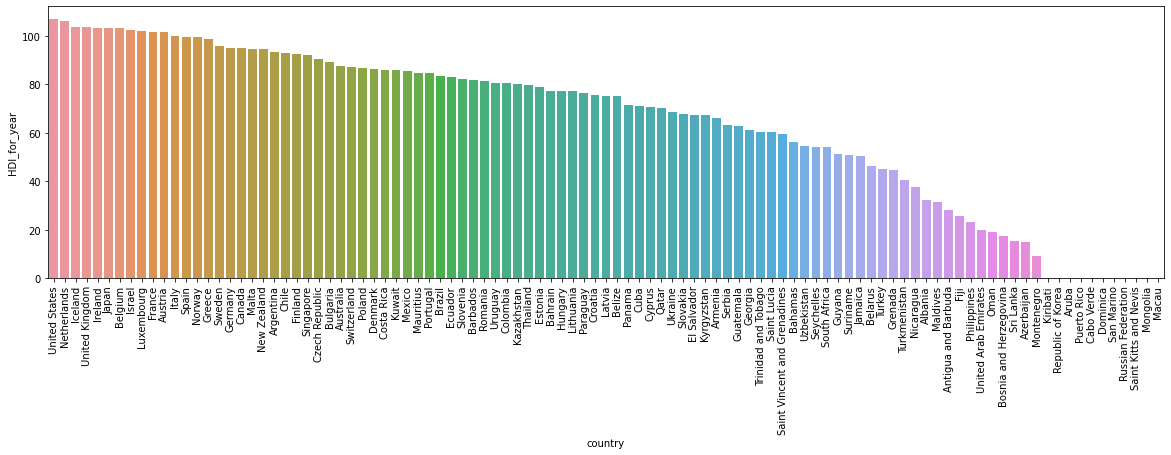

,country,year,suicides_no,population,suicides_pop,HDI_for_year,gdp_for_year,gdp_per_capita
98,United States,744000,1034013,8054027201,5140.97,106.992,3909984936000000,14608296
61,Netherlands,764160,50833,475361269,4066.52,106.164,207251685054986,13643004
41,Iceland,764160,1108,8407904,4889.74,103.620,4101398167282,15002956
97,United Kingdom,744000,136805,1738767780,2790.92,103.620,675577098626700,11869908
42,Ireland,719820,12574,109023686,3881.73,103.512,47361109993068,12323112
...,...,...,...,...,...,...,...,...
79,San Marino,72048,4,78825,145.62,0.000,51314998032,1931892
75,Russian Federation,648648,1209742,3690802620,11305.13,0.000,286520625200304,2112096
76,Saint Kitts and Nevis,71676,0,117300,0.00,0.000,7776671112,198900
59,Mongolia,20160,423,2167589,184.39,0.000,111834581310,41450


In [28]:
plt.figure(figsize=(20,5))
sns.barplot(x = "country", y = 'HDI_for_year', data = country_gdp.sort_values(by = "HDI_for_year", ascending = False))
plt.xticks(rotation = 90)
plt.show()
data = country_gdp.sort_values(by = "HDI_for_year", ascending = False)
data

In [29]:
df.corr()

,year,suicides_no,population,suicides_pop,HDI_for_year,gdp_for_year,gdp_per_capita
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.094529,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.430096,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.710697,0.081510
suicides_pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.025240,0.001785
HDI_for_year,0.366786,0.151399,0.102943,0.074279,1.000000,0.305193,0.771228
gdp_for_year,0.094529,0.430096,0.710697,0.025240,0.305193,1.000000,0.303405
gdp_per_capita,0.339134,0.061330,0.081510,0.001785,0.771228,0.303405,1.000000


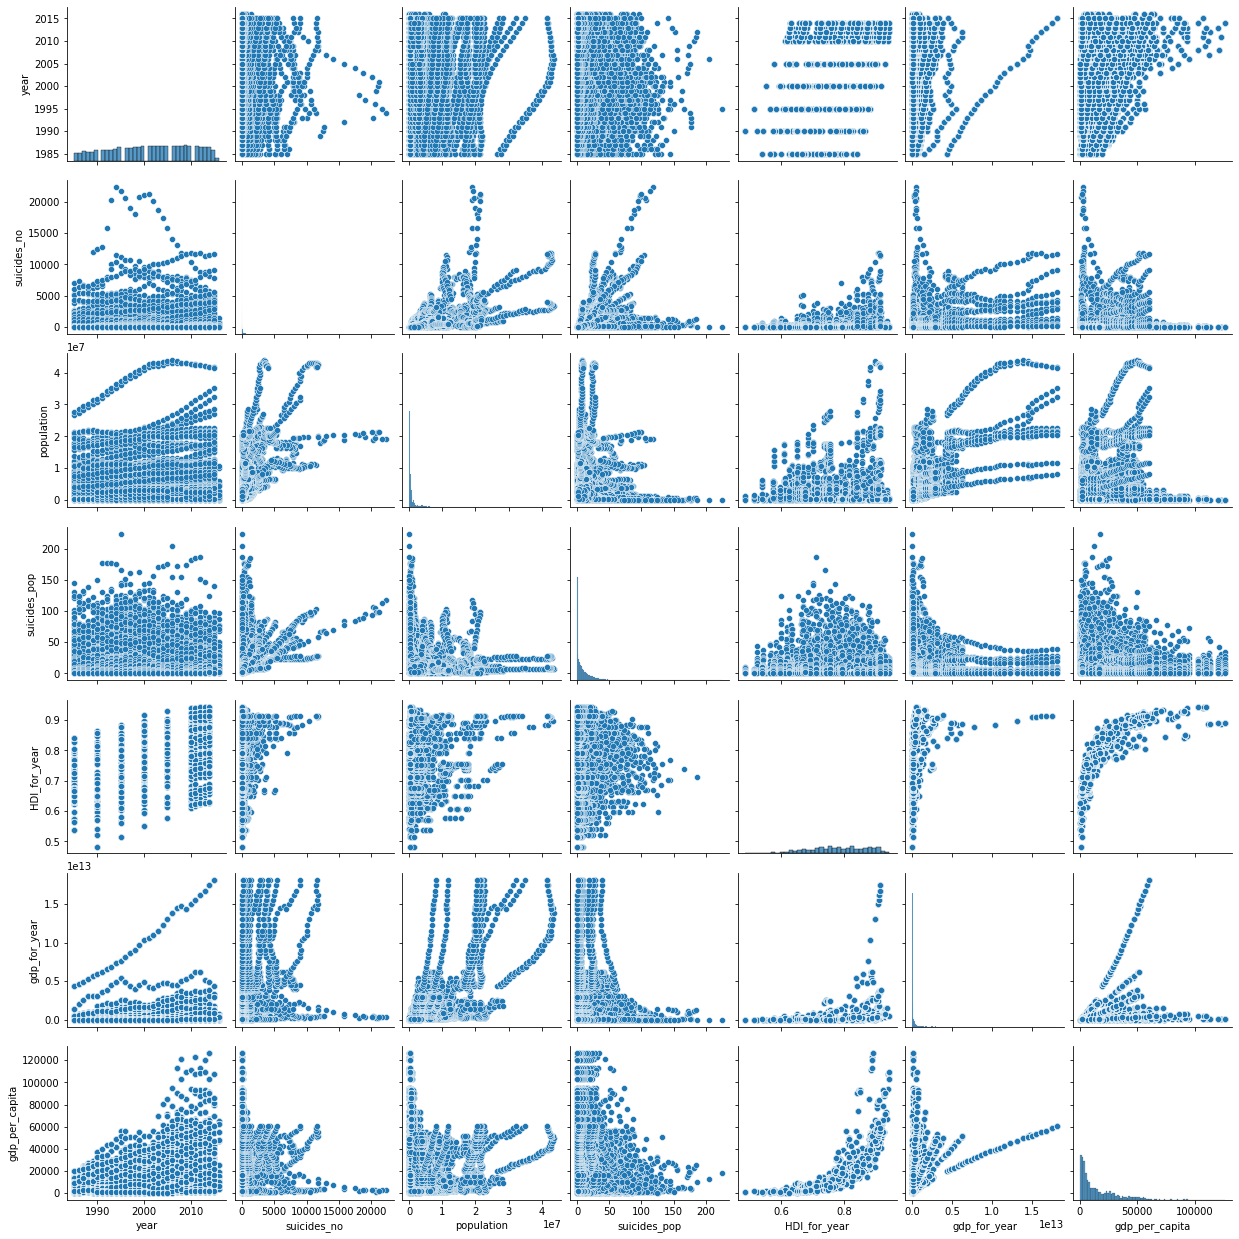

In [30]:
sns.pairplot(df)

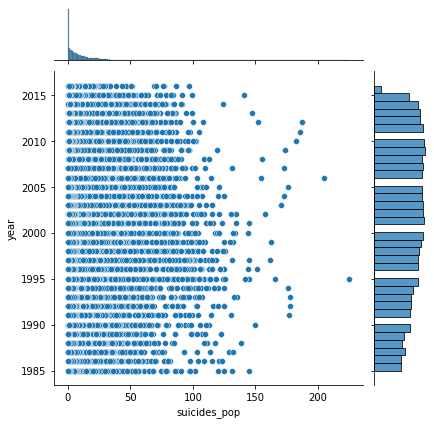

In [31]:
sns.jointplot(x='suicides_pop', y='year', data = df)

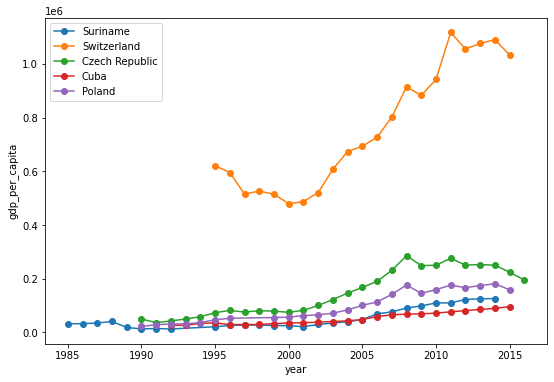

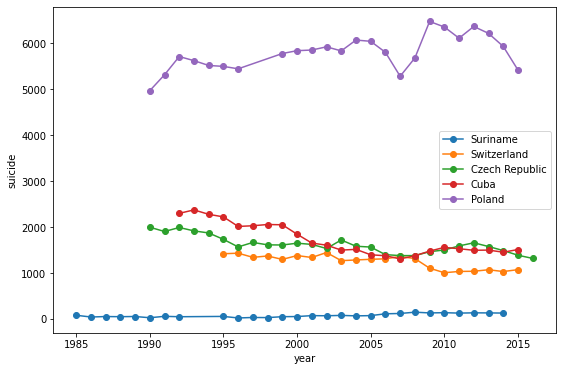

In [32]:
plt.figure(figsize = (9,6))
df_gdp = df.groupby(["country","year"])['gdp_per_capita'].apply(sum)
for country in country_list[20:25]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("gdp_per_capita")
plt.legend()
plt.show()
plt.figure(figsize = (9,6))
df_gdp = df.groupby(["country","year"])['suicides_no'].apply(sum)
for country in country_list[20:25]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("suicide")
plt.legend()
plt.show()

In [33]:
df2=df[['suicides_no','population','gdp_per_capita','sex']]

In [34]:
df['sex']=df.sex.replace({'female':0,
                'male':1})

In [35]:
df2.isnull().sum()

suicides_no       0
population        0
gdp_per_capita    0
sex               0
dtype: int64

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   suicides_no     27820 non-null  int64 
 1   population      27820 non-null  int64 
 2   gdp_per_capita  27820 non-null  int64 
 3   sex             27820 non-null  object
dtypes: int64(3), object(1)
memory usage: 869.5+ KB


In [37]:
df2.corr().suicides_no

suicides_no       1.000000
population        0.616162
gdp_per_capita    0.061330
Name: suicides_no, dtype: float64

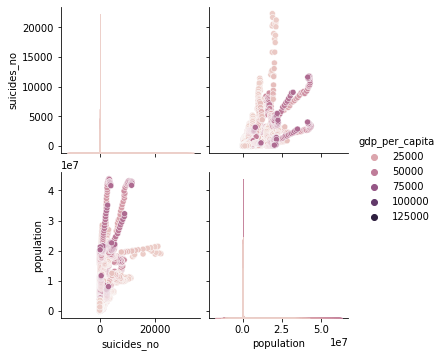

In [40]:
g=sns.pairplot(df2,hue="gdp_per_capita")